In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors
import data
import tests
%matplotlib inline

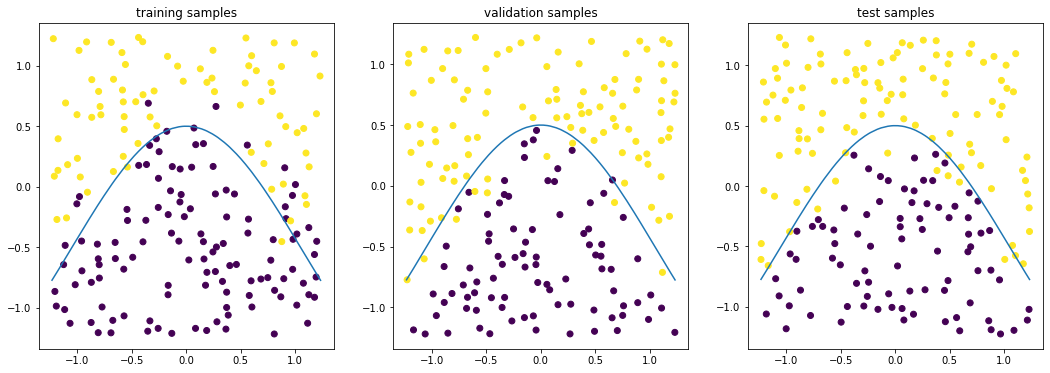

In [7]:
binary_data = data.BinaryData()
fig, axs = plt.subplots(1, 3)
fig.set_figheight(6), fig.set_figwidth(18)
for i, name in enumerate(["training", "validation", "test"]):
    axs[i].plot(*binary_data.boundary())
    axs[i].set_title("%s samples" % name)
axs[0].scatter(binary_data.X_train[:, 0], binary_data.X_train[:, 1], c=binary_data.y_train)
axs[1].scatter(binary_data.X_valid[:, 0], binary_data.X_valid[:, 1], c=binary_data.y_valid)
axs[2].scatter(binary_data.X_test[:, 0], binary_data.X_test[:, 1], c=binary_data.y_test)
plt.show()

In [133]:
binary_data.X.shape

(576, 2)

In [135]:
binary_data.y.shape[0]

576

In [228]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(binary_data.X, binary_data.y, test_size =.2, train_size=.8, random_state=5)

In [241]:
neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5,weights="distance",p=2)
neighbors_model.fit(X_train, y_train)
print("K Nearest Neighbors")
print(neighbors_model.score(X_test, y_test))
y_predicted = neighbors_model.predict(X_test)
print("f1 score: ",sklearn.metrics.f1_score(y_test, y_predicted))

K Nearest Neighbors
0.9482758620689655
f1 score:  0.9473684210526316


In [242]:


number_features = binary_data.X.shape[1]
number_samples = binary_data.X.shape[0]

data_X = binary_data.X
data_y = binary_data.y
number_samples

576

In [257]:
bt =sklearn.neighbors.BallTree(data_X)
print(bt.idx_array)

<MemoryView of 'ndarray' object>


In [243]:
import pandas as pd

In [232]:
pd.DataFrame(data_X)

,0,1
0,0.189573,0.862709
1,0.364240,-1.178495
2,0.162913,-0.598528
3,-0.348265,0.690104
4,0.023737,-0.606601
...,...,...
571,0.456063,0.190255
572,0.974832,0.874715
573,-1.122136,0.753162
574,0.501535,1.091864


In [233]:
pd.DataFrame(data_y)

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
571,0.0
572,1.0
573,1.0
574,1.0


In [234]:
data_X.shape

(576, 2)

In [235]:
def min_max_scaling(data_):
    scaled_data = np.zeros(data_.shape)
    num_samples= scaled_data.shape[0]
    for i in range(number_features):
        scale = np.max(data_[:,i])-np.min(data_[:,i])
        low = np.min(data_[:,i])
        for j in range(num_samples):
            scaled_data[j,i] = (data_[j,i] - low)/scale

    return scaled_data
        
def normalization(data_):
    norm_data = np.zeros(data_.shape)
    num_samples = norm_data.shape[0]
    for i in range(number_features):
        mean = np.average(data_[:,i])
        dev = np.std(data_[:,i])
        for j in range(num_samples):
            norm_data[j,i] = (data_[j,i] - mean)/dev
    return norm_data

In [244]:
scaledX =min_max_scaling(data_X)
normX = normalization(data_X)


In [245]:
normX_train, normX_test = normalization(X_train), normalization(X_test)
scaledX_train, scaledX_test = min_max_scaling(X_train), min_max_scaling(X_test)

In [248]:
neighbors_model.fit(scaledX_train, y_train)
print("K Nearest Neighbors")
print(neighbors_model.score(scaledX_test, y_test))
scaledy_predicted = neighbors_model.predict(scaledX_test)
print("f1 score: ",sklearn.metrics.f1_score(y_test, scaledy_predicted))

K Nearest Neighbors
0.9396551724137931
f1 score:  0.9391304347826087


In [249]:
neighbors_model.fit(normX_train, y_train)
print("K Nearest Neighbors")
print(neighbors_model.score(normX_test, y_test))
normy_predicted = neighbors_model.predict(normX_test)
print("f1 score: ",sklearn.metrics.f1_score(y_test, normy_predicted))

K Nearest Neighbors
0.9396551724137931
f1 score:  0.9391304347826087


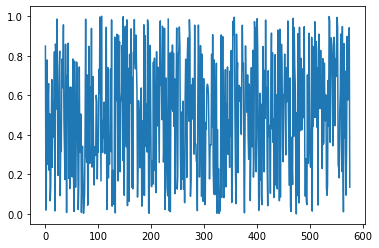

In [240]:
plt.plot(scaledX[:,1])

(array([21.,  6., 13.,  8., 18.,  6., 14., 10., 13., 11.,  8., 16., 12.,
        12.,  5., 16., 10., 13.,  4., 20.,  4., 14., 10., 16.,  8., 15.,
         9.,  8., 16.,  6., 18.,  5., 17.,  6., 16.,  4., 16.,  8., 12.,
        12., 16.,  8., 19.,  5., 10., 14.,  7., 17.,  6., 18.]),
 array([-1.69413372, -1.62614152, -1.55814932, -1.49015712, -1.42216491,
        -1.35417271, -1.28618051, -1.21818831, -1.1501961 , -1.0822039 ,
        -1.0142117 , -0.9462195 , -0.8782273 , -0.81023509, -0.74224289,
        -0.67425069, -0.60625849, -0.53826629, -0.47027408, -0.40228188,
        -0.33428968, -0.26629748, -0.19830528, -0.13031307, -0.06232087,
         0.00567133,  0.07366353,  0.14165573,  0.20964794,  0.27764014,
         0.34563234,  0.41362454,  0.48161674,  0.54960895,  0.61760115,
         0.68559335,  0.75358555,  0.82157776,  0.88956996,  0.95756216,
         1.02555436,  1.09354656,  1.16153877,  1.22953097,  1.29752317,
         1.36551537,  1.43350757,  1.50149978,  1.56949198,

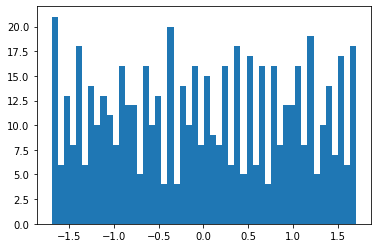

In [197]:
#plt.hist(scaledX[:,1],bins=50)
plt.hist(normX[:,1],bins=50)

(array([21.,  6., 13.,  8., 18.,  6., 14., 10., 13., 11.,  8., 16., 12.,
        12.,  5., 16., 10., 13.,  4., 20.,  4., 14., 10., 16.,  8., 15.,
         9.,  8., 16.,  6., 18.,  5., 17.,  6., 16.,  4., 16.,  8., 12.,
        12., 16.,  8., 19.,  5., 10., 14.,  7., 17.,  6., 18.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

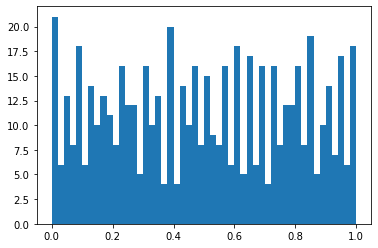

In [195]:
plt.hist(scaledX[:,1],bins=50)

In [57]:
binary_data.y.shape

(576,)

In [60]:
X_train.shape[0]

460

In [81]:
euclidian_distance = np.square(np.abs( X_train[:,0] -X_train[:,1] ))

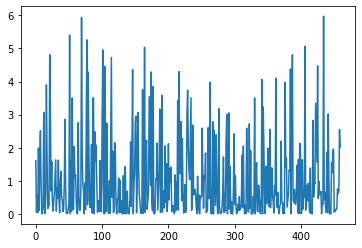

In [82]:
plt.plot(euclidian_distance)

(array([ 7.,  9.,  2.,  2.,  7.,  4.,  5.,  0.,  8.,  6.,  5.,  0.,  5.,
         5.,  8.,  0.,  5.,  7.,  4.,  3.,  1.,  5.,  5.,  8.,  0., 10.,
         6.,  4.,  0.,  4.,  6.,  7.,  2.,  7.,  5.,  4.,  4.,  0.,  8.,
         5.,  4.,  0., 10.,  3.,  8.,  0.,  5., 10.,  6.,  0.,  2., 10.,
         4.,  5.,  1.,  6.,  9.,  5.,  0.,  5.,  9.,  6.,  0.,  4.,  6.,
         8.,  2.,  1.,  7.,  6.,  3.,  0.,  5.,  7.,  8.,  0.,  7.,  2.,
        10.,  0.,  5.,  7.,  8.,  0.,  8.,  9.,  2.,  1.,  1.,  8.,  9.,
         1.,  1.,  4.,  6.,  4.,  0.,  4., 10.,  5.]),
 array([-1.22640411, -1.20179968, -1.17719525, -1.15259082, -1.12798639,
        -1.10338196, -1.07877753, -1.0541731 , -1.02956868, -1.00496425,
        -0.98035982, -0.95575539, -0.93115096, -0.90654653, -0.8819421 ,
        -0.85733767, -0.83273325, -0.80812882, -0.78352439, -0.75891996,
        -0.73431553, -0.7097111 , -0.68510667, -0.66050224, -0.63589782,
        -0.61129339, -0.58668896, -0.56208453, -0.5374801 , -0.512875

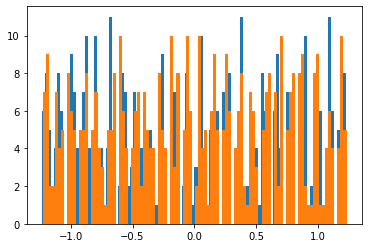

In [78]:
plt.hist(X_train[:,0],bins=100)
plt.hist(X_train[:,1],bins=100)

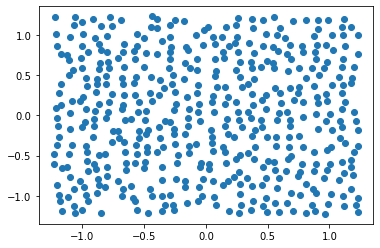

In [199]:
plt.scatter(X_train[:,0],X_train[:,1])

In [3]:
a = [-1,-1,3]

In [5]:
a.count(-1)

2

In [9]:
someset=set(a)

In [12]:
somese

NameError: name 'somese' is not defined